## Actividad coderhouse

Tenemos un dataset que nos muestra el comportamiento de compra de clientes. Son 3900 registros con 17 variables o columnas. Con esta información uno puede entender mejor cómo la gente realiza sus compras del día a día, e inferir comportamientos que podrían ser de utilidad al negocio a la hora de crear nuevas promociones o productos. Se elige este dataset ya que posee información real y tiene variables interesantes que podrían ser utilizadas como por ejemplo métodos de pagos de interés, preferencias según género de las personas, correlación entre descuentos y frecuencia de compra, etc... 

En este proyecto se intentará responder las siguientes preguntas y validar hipótesis sobre ellas:

Pregunta 1: Existe preferencia de los colores que se llevan en productos?
Hipótesis 1: Hay colores como el negro y blanco que no tienen diferencia en preferencias, versus otros como el rosado que si la tienen.

Pregunta 2: ¿Las ofertas y/o descuentos hacen que la gente compre compre con mayo frecuencia?
Hipótesis 2: Las personas que compran con descuentos, compran con mayor frecuencia

Pregunta 3: Qué público es mas suceptivo a pagar con tarjeta versus efectivo?
Hipótesis 32: El público de edad mas avanzada tiende a pagar más con efectivo qué el público joven.

In [28]:
#Importar librerías a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Primero se debe cargar el csv, asumiendo que el archivo está en la misma carpeta que la notebook
file_path = 'shopping_trends.csv' 
df = pd.read_csv(file_path)

# mostrar las primeras 5 filas para ver la composición de los datos
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [29]:
# Eliminar las columnas innecesarias (Location, Season, Review Rating)
df = df.drop(columns=['Location', 'Season', 'Review Rating'])

# Mostrar las primeras 5 filas del DataFrame reducido
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Size,Color,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,L,Gray,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,L,Maroon,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,S,Maroon,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,M,Maroon,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,M,Turquoise,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [30]:
# Se revisa los tipos de dato y si hay datos null con info(). Los tipos de datos están asignados correctamente y no hay datos null por ende no será necesario hacer una limpieza.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Customer ID               3900 non-null   int64 
 1   Age                       3900 non-null   int64 
 2   Gender                    3900 non-null   object
 3   Item Purchased            3900 non-null   object
 4   Category                  3900 non-null   object
 5   Purchase Amount (USD)     3900 non-null   int64 
 6   Size                      3900 non-null   object
 7   Color                     3900 non-null   object
 8   Subscription Status       3900 non-null   object
 9   Payment Method            3900 non-null   object
 10  Shipping Type             3900 non-null   object
 11  Discount Applied          3900 non-null   object
 12  Promo Code Used           3900 non-null   object
 13  Previous Purchases        3900 non-null   int64 
 14  Preferred Payment Method

In [31]:
# Para identificar outliers de valores númericos se utiliza describe, con la finalidad de encontrar máximos y mínimos fuera de lo común. Al parecer no hay.
df.describe()

,Customer ID,Age,Purchase Amount (USD),Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,25.351538
std,1125.977353,15.207589,23.685392,14.447125
min,1.000000,18.000000,20.000000,1.000000
25%,975.750000,31.000000,39.000000,13.000000
50%,1950.500000,44.000000,60.000000,25.000000
75%,2925.250000,57.000000,81.000000,38.000000
max,3900.000000,70.000000,100.000000,50.000000


### Existe preferencia de los colores que se llevan en productos?

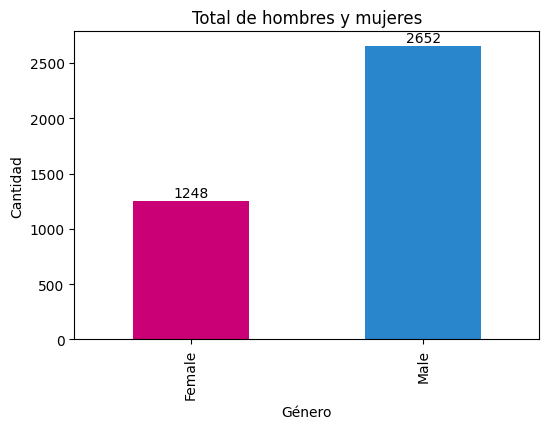

In [32]:
# primero se verá si la proporci´pon entre hombre y mujeres es igual. De ser igual no será necesario normalizar los datos para futuros análsiis.
color_gender_pivot = pd.crosstab(df['Color'], df['Gender'])
gender_totals = color_gender_pivot.sum()

plt.figure(figsize=(6, 4))
ax = gender_totals.plot(kind='bar', color=['#c90076','#2986cc'], width=0.5)

for i, value in enumerate(gender_totals):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')  

plt.title('Total de hombres y mujeres')
plt.ylabel('Cantidad')
plt.xlabel('Género')
plt.show()

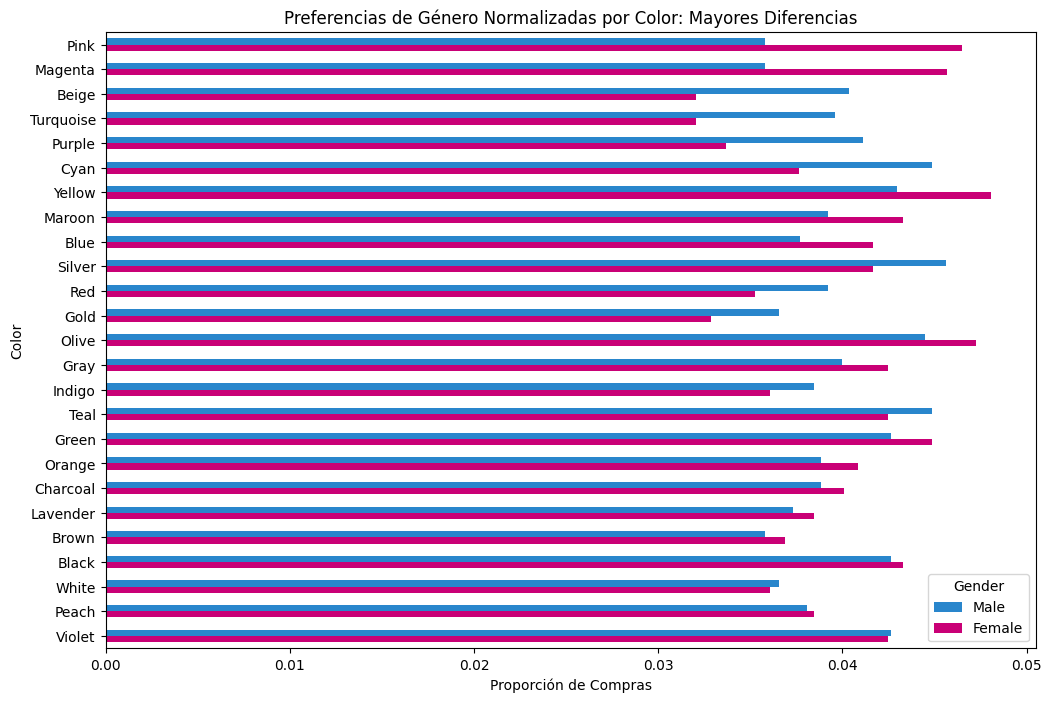

In [33]:
# Como la proporción es distinta, se necesitará normalizar los parámetros.

# Crear la tabla de frecuencia para Color y Género
color_gender_count = pd.crosstab(df['Color'], df['Gender'])

# Normalizar los conteos por género para obtener la proporción de cada color dentro de cada género
color_gender_normalized = color_gender_count.div(color_gender_count.sum(axis=0), axis=1)

# Calcular la diferencia absoluta entre las proporciones normalizadas por género
color_gender_normalized['Difference'] = abs(color_gender_normalized['Male'] - color_gender_normalized['Female'])

# Ordenar la tabla por la columna 'Difference' en orden descendente (mayores diferencias primero)
color_gender_sorted = color_gender_normalized.sort_values(by='Difference', ascending=False)

# Visualizar los resultados ordenados en un gráfico de barras horizontal con las mayores diferencias primero
# colores -> Hombre: #2986cc, Mujer: #c90076
color_gender_sorted[['Male', 'Female']].plot(
    kind='barh', 
    figsize=(12, 8), 
    stacked=False, 
    color=['#2986cc', '#c90076']  
)

# Invertir el eje y para asegurar que las mayores diferencias estén en la parte superior
plt.gca().invert_yaxis()

# Añadir títulos y etiquetas
plt.title('Preferencias de Género Normalizadas por Color: Mayores Diferencias')
plt.xlabel('Proporción de Compras')
plt.ylabel('Color')

plt.show()


Conclusión: Se puede ver que los colores que tienen mas diferencia de preferencia son el rosado y magenta para mujeres. Y para hombres el Beige, Turquesa, y Morado. El resto de los colores parecería no tener tanta diferencia en preferencias, y cómo es de esperar colores como Blanco o Negro no tienen preferencia alguna. Esta información podría ser de utilidad a la hora de desarrollar nuevos productos orientas a géneros distnitos.

### Ofertas y descuentos hace que la gente compre con mayor frecuencia

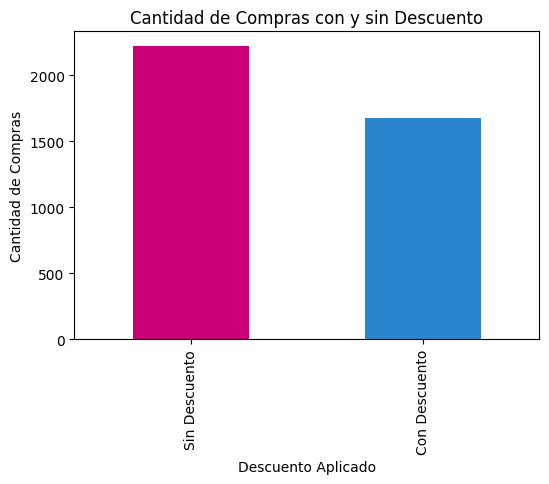

In [34]:

# Contar cuántas compras tienen descuento y cuántas no, si la diferencia es sustancial se deberá normalizar en el posterior análisis
purchase_count_by_discount = df['Discount Applied'].value_counts()

# Crear un gráfico de barras con los resultados
plt.figure(figsize=(6, 4))
purchase_count_by_discount.plot(kind='bar', color=['#c90076', '#2986cc'], width=0.5)

# Añadir títulos y etiquetas
plt.title('Cantidad de Compras con y sin Descuento')
plt.ylabel('Cantidad de Compras')
plt.xlabel('Descuento Aplicado')

# Personalizar etiquetas del eje x
plt.xticks([0, 1], ['Sin Descuento', 'Con Descuento'])

# Mostrar el gráfico
plt.show()


In [35]:
#tipos de frencuencia, para luego ordenarlas de menor frecuencia a mayor frecuencia y no por orden alfabético
distinct_values = df['Frequency of Purchases'].unique()
print(distinct_values)

['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']


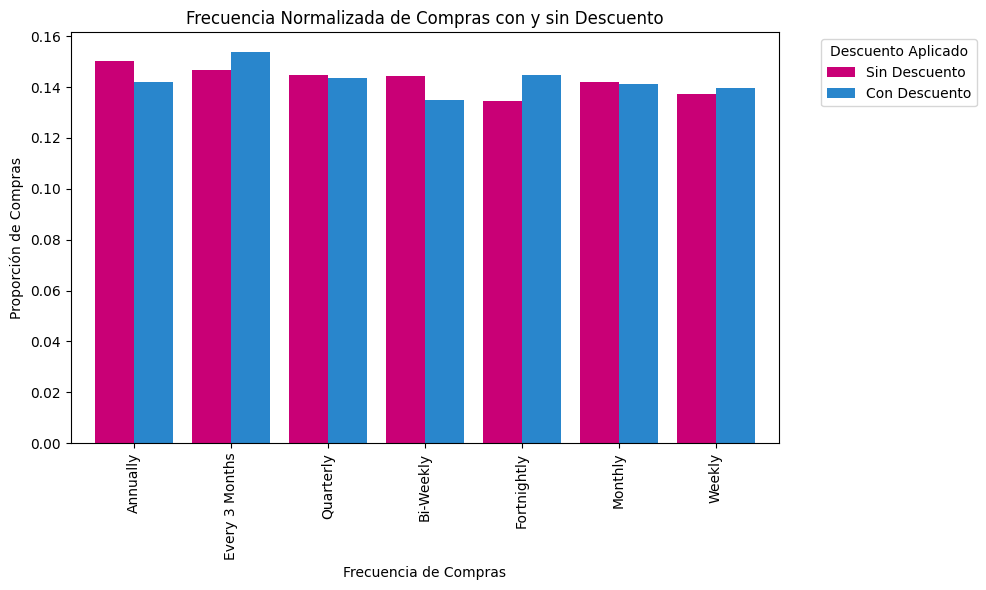

In [36]:
# Definir el orden personalizado para 'Frequency of Purchases'
frequency_order = ['Annually', 'Every 3 Months', 'Quarterly', 'Bi-Weekly', 'Fortnightly', 'Monthly', 'Weekly']

# Crear una tabla de frecuencias (crosstab) para contar las ocurrencias de 'Frequency of Purchases' con 'Discount Applied' (Sí o No)
discount_frequency_count = pd.crosstab(df['Frequency of Purchases'], df['Discount Applied'])

# Normalizar los valores dividiendo por el total de cada categoría de descuento
discount_frequency_normalized = discount_frequency_count.div(discount_frequency_count.sum(axis=0), axis=1)

# Reindexar la tabla crosstab con el orden personalizado para 'Frequency of Purchases'
discount_frequency_normalized = discount_frequency_normalized.reindex(frequency_order)

# Graficar los resultados normalizados en un gráfico de barras agrupadas con el orden personalizado
ax = discount_frequency_normalized.plot(kind='bar', figsize=(10, 6), color=['#c90076', '#2986cc'], width=0.8)

# Añadir títulos y etiquetas
plt.title('Frecuencia Normalizada de Compras con y sin Descuento')
plt.ylabel('Proporción de Compras')
plt.xlabel('Frecuencia de Compras')

# Mover la leyenda fuera del gráfico
plt.legend(['Sin Descuento', 'Con Descuento'], title='Descuento Aplicado', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el diseño para que se vea mejor con la leyenda fuera
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Conclusión: No se aprecia ninguna correlación significativa entre compras con descuentos y la frecuencia de compras del comprador. Por lo tanto, se podría concluir que los descuentos no influyen en la frecuencia de compra de los consumidores.

### Qué público es mas suceptible a pagar en efectivo?


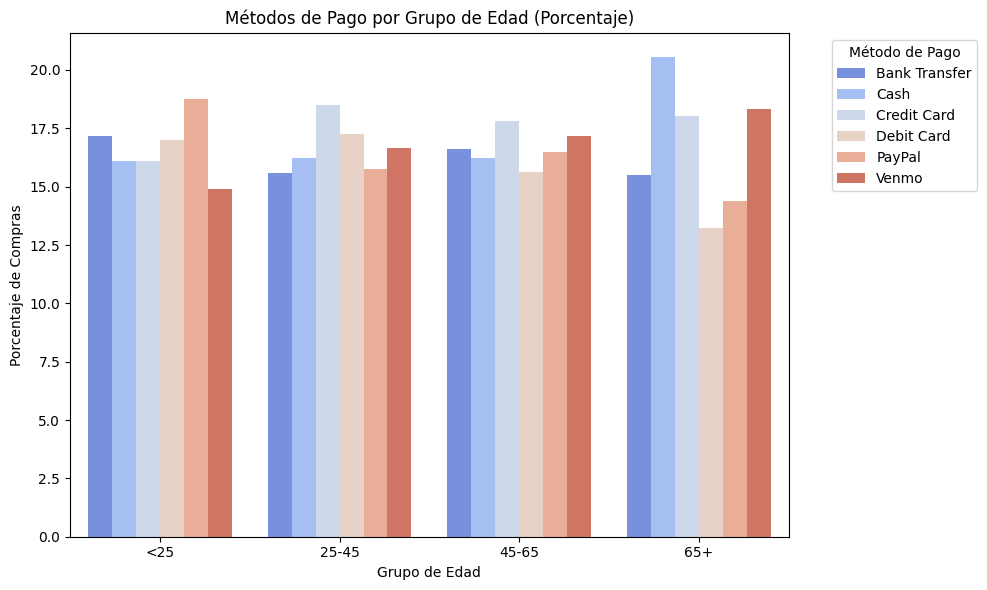

In [37]:
# 1. Crear grupos de edad (ajusta los límites según sea necesario)
bins = [0, 25, 45, 65, 100]  # Categorías de edad: <25 (joven), 25-45, 45-65, 65+ (mayor)
labels = ['<25', '25-45', '45-65', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# 2. Crear una tabla crosstab para ver la distribución del método de pago por grupo de edad
age_payment_method = pd.crosstab(df['Age Group'], df['Payment Method'])

# 3. Normalizar los valores de la tabla por fila para mostrar porcentajes
age_payment_method_percentage = age_payment_method.div(age_payment_method.sum(axis=1), axis=0) * 100

# 4. Convertir a formato largo para facilitar el uso con Seaborn
age_payment_method_percentage = age_payment_method_percentage.reset_index().melt(id_vars='Age Group', var_name='Payment Method', value_name='Percentage')

# 5. Graficar los resultados en un gráfico de barras apiladas con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Percentage', hue='Payment Method', data=age_payment_method_percentage, palette='coolwarm')

# Añadir títulos y etiquetas
plt.title('Métodos de Pago por Grupo de Edad (Porcentaje)')
plt.ylabel('Porcentaje de Compras')
plt.xlabel('Grupo de Edad')

# Mover la leyenda fuera del gráfico
plt.legend(title='Método de Pago', bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Si bien no se aprecia una tan alta tendencia respecto a métodos de pago, se puede apreciar que personas por sobre los 65 años tienen como preferencia usar efectivo por sobre otros medios de pago. Por otro lado los mas jovenes tienden a usar efectivo como una de sus últimas preferencias. Esta información puede ser de utilidad ya que si vendo productos para adultos mayores, tendré que asegurarme de tener siempre acmbio en la caja, ya que tendré que dar vuelto o cambiar billetes por monedas.

### Modelo de clasificación de método de pago

Este proyecto implementa un modelo de clasificación cuyo objetivo es predecir el método de pago que utilizarán los clientes, basado en sus características demográficas (como edad y género) y en su comportamiento de compra (monto gastado, uso de descuentos, historial de compras, entre otros)

In [38]:
# Preprocesamiento de los datos

# Eliminar columnas que no son útiles para la predicción
df = df.drop(columns=['Customer ID', 'Item Purchased', 'Category', 'Size', 'Color', 'Preferred Payment Method'])


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.15      0.17      0.16       108
           1       0.23      0.23      0.23       132
           2       0.20      0.41      0.27       140
           3       0.25      0.13      0.17       136
           4       0.29      0.06      0.10       134
           5       0.19      0.20      0.19       130

    accuracy                           0.20       780
   macro avg       0.22      0.20      0.19       780
weighted avg       0.22      0.20      0.19       780

Matriz de Confusión:
[[18 16 41 12  4 17]
 [19 31 48  6  7 21]
 [19 25 58 12  3 23]
 [25 19 49 18  4 21]
 [21 18 44 13  8 30]
 [22 27 43 10  2 26]]


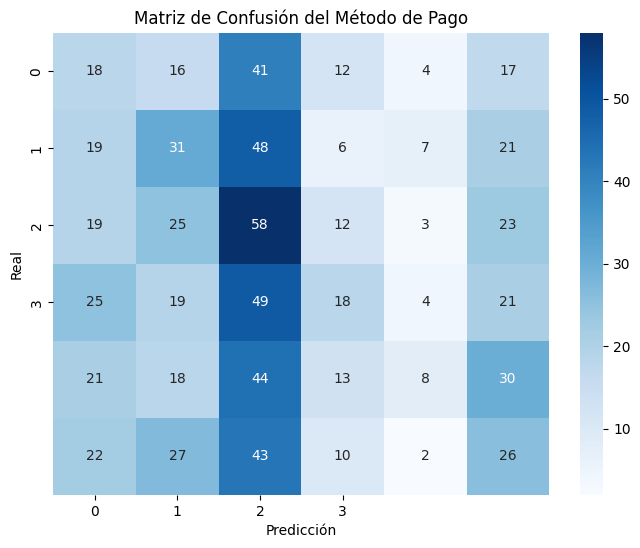

In [46]:

# Convertir variables categóricas a numéricas con LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df['Gender'] = label_enc.fit_transform(df['Gender'])  # 'Male' será 1 y 'Female' será 0
df['Subscription Status'] = label_enc.fit_transform(df['Subscription Status'])  # 'Yes' será 1, 'No' será 0
df['Payment Method'] = label_enc.fit_transform(df['Payment Method'])  # Método de pago
df['Shipping Type'] = label_enc.fit_transform(df['Shipping Type'])  # Tipo de envío
df['Discount Applied'] = label_enc.fit_transform(df['Discount Applied'])  # 'Yes' será 1 y 'No' será 0
df['Promo Code Used'] = label_enc.fit_transform(df['Promo Code Used'])  # 'Yes' será 1 y 'No' será 0
df['Frequency of Purchases'] = label_enc.fit_transform(df['Frequency of Purchases'])  # Frecuencia de compras
df['Age Group'] = label_enc.fit_transform(df['Age Group'])

# Definir las características (X) y el objetivo (y)
X = df.drop(columns=['Payment Method'])  # Usar todas las columnas excepto el método de pago
y = df['Payment Method']  # Esta es la columna objetivo que queremos predecir

# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de clasificación (Regresión Logística)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación del modelo
from sklearn.metrics import classification_report, confusion_matrix

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Visualización de la matriz de confusión con etiquetas correctas
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_enc.classes_,  
            yticklabels=label_enc.classes_)  
plt.title('Matriz de Confusión del Método de Pago')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


### Conclusión

El modelo de clasificación actual presenta un rendimiento deficiente, con una precisión de solo 20% y bajos "F1-scores" en todas las clases, lo que indica que el modelo no está capturando bien las diferencias entre los métodos de pago. 

La matriz de confusión revela que el modelo comete numerosos errores, confundiendo las clases con frecuencia. Por ejemplo, en la clase 2, el modelo predijo incorrectamente 58 veces que pertenecía a esa clase cuando en realidad correspondía a otras.

### Clasificación de la Frecuencia de Compras
En este experimento, se desarrolló un modelo de clasificación con el fin de predecir la frecuencia de compras de los clientes, utilizando características como edad, género, monto de compra, uso de descuentos, estado de suscripción y tipo de envío. El objetivo era identificar patrones en el comportamiento de los clientes que permitan anticipar si comprarán de manera semanal, mensual, trimestral, entre otras categorías

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.14      0.14      0.14       121
           1       0.11      0.14      0.12        96
           2       0.13      0.17      0.15       109
           3       0.10      0.12      0.11        98
           4       0.09      0.06      0.07       117
           5       0.17      0.14      0.16       129
           6       0.10      0.08      0.09       110

    accuracy                           0.12       780
   macro avg       0.12      0.12      0.12       780
weighted avg       0.12      0.12      0.12       780

Matriz de Confusión:
[[17 18 21 18 18 12 17]
 [18 13 17 18  9 13  8]
 [14 20 19 16 14 19  7]
 [20 20 22 12  5  8 11]
 [20 15 24 20  7 16 15]
 [13 13 23 19 16 18 27]
 [18 17 18 21 10 17  9]]


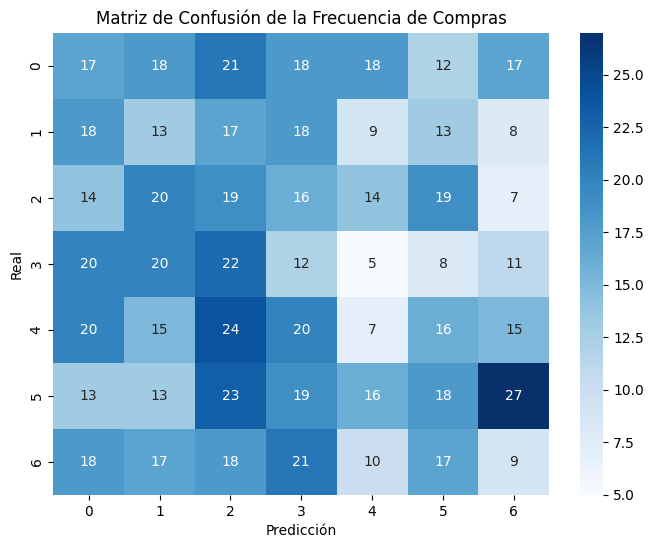

In [45]:
# Convertir la columna 'Frequency of Purchases' a valores numéricos con LabelEncoder
df['Frequency of Purchases'] = label_enc.fit_transform(df['Frequency of Purchases'])

# Definir las variables (X) y el objetivo (y)
X = df.drop(columns=['Frequency of Purchases'])  # Usar todas las columnas excepto 'Frequency of Purchases'
y = df['Frequency of Purchases']  # Esta es la columna objetivo que queremos predecir

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo de clasificación (Random Forest en este caso)
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Evaluación del modelo
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_enc.classes_, 
            yticklabels=label_enc.classes_)
plt.title('Matriz de Confusión de la Frecuencia de Compras')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


### Conclusión
Con una precisión global del 12% y F1-scores bajos, el modelo no está logrando capturar patrones significativos para predecir la frecuencia de compra. La matriz de confusión muestra una gran cantidad de clasificaciones incorrectas, lo que indica que el modelo no está diferenciando bien entre las distintas categorías de frecuencia de compras.

Conclusión final:
Los datos son bastante homogeneos por lo tanto es díficil hacer predicciones en base a la data que se tiene. Quizás faltan mas datos para concluir algo, pero con el dataframe actual parecería dificil hacer predicciones asertivas.